In [14]:
from summary import create_summary
import pandas as pd

df, avg, std = create_summary("")

<Axes: >

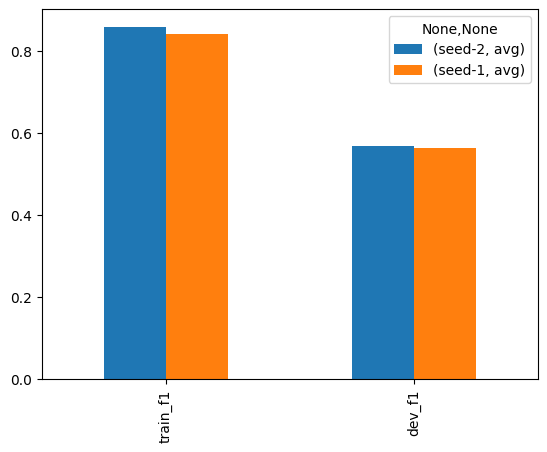

In [16]:
idx = pd.IndexSlice
df.reset_index(level=0).loc[:, idx[:, "avg"]].plot(kind="bar")

In [ ]:
import seaborn as sns

fg = sns.catplot()

In [1]:
import sys
import os

thesis_path = "/" + os.path.join(
    *os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)
thesis_path, os.getcwd()

('/Users/robinloebbert/Masterarbeit/thesis',
 '/Users/robinloebbert/Masterarbeit/thesis/evaluations')

In [2]:
from pipelines.evaluation import factors

denoms = factors(40)

In [6]:
denoms[denoms.index(2)+1]

4

In [3]:
factors(50)

[1, 2, 5, 10, 25, 50]

In [3]:
dataset_files={
                   "train":
                   "/Users/robinloebbert/Masterarbeit/thesis/data/wnut/wnut_train.json",
                   "dev":
                   "/Users/robinloebbert/Masterarbeit/thesis/data/wnut/wnut_dev.json",
                   "test":
                   "/Users/robinloebbert/Masterarbeit/thesis/data/wnut/wnut_test.json",
                   "types":
                   "/Users/robinloebbert/Masterarbeit/thesis/data/wnut/wnut_types.json"
               }

In [8]:
import json
from collections import Counter
def entity_count(dataset_file):
    with open(dataset_file, "r", encoding="utf-8") as file:
        dataset = json.load(file)
    entities = []
    for item in dataset:
        for entity in item["entities"]:
            if entity["end"] - entity["start"] == 0:
                entity["end"] +=1
            entities.append((" ".join(item["tokens"][entity["start"]:entity["end"]]) , entity["type"]))
    return Counter(entities)

train_entities = entity_count(dataset_files["train"])

In [6]:
dev_entities = entity_count(dataset_files["dev"])
test_entities = entity_count(dataset_files["test"])

In [54]:
from typing import Iterable

def calc_set_intersection(first: Iterable, second: Iterable):
    return set(first).intersection(set(second))

In [55]:
train_dev_overlap = calc_set_intersection(train_entities, dev_entities)
len(train_dev_overlap)

0

In [56]:
train_test_overlap = calc_set_intersection(train_entities, test_entities)
len(train_test_overlap)

0

In [61]:

dev_test_overlap = calc_set_intersection(dev_entities, test_entities)

def overlap_metrics(first: Counter, second: Counter):
    overlap = calc_set_intersection(first, second)
    total_count = len(overlap)
    if total_count == 0:
        return total_count, 0.0, 0.0
    rel_first = sum([first[item] for item in overlap]) / sum([value for value in first.values()])
    rel_second = sum([second[item] for item in overlap]) / sum([value for value in second.values()])
    return total_count, rel_first, rel_second

(
    overlap_metrics(train_entities, dev_entities),
    overlap_metrics(train_entities, test_entities),
    overlap_metrics(dev_entities, test_entities)
 )

((0, 0.0, 0.0), (0, 0.0, 0.0), (33, 0.061004784688995214, 0.06672845227062095))

In [50]:
import pandas as pd
def plot_entity_count(entity_count: Counter):
    entities_df = pd.DataFrame.from_records([ {"entity": key[0], "type": key[1], "count": count} for key, count in entity_count.items()])
    # indexed_df = entities_df.set_index(["entity", "type"])
    entities_df.sort_values(by=["count"], ascending=False, inplace=True)
    entities_df.reset_index(inplace=True)
    return entities_df, entities_df.plot(y="count", ylabel="Occurances", xlabel="Entities", use_index=True, xlim)

<AxesSubplot: xlabel='Entities', ylabel='Occurances'>

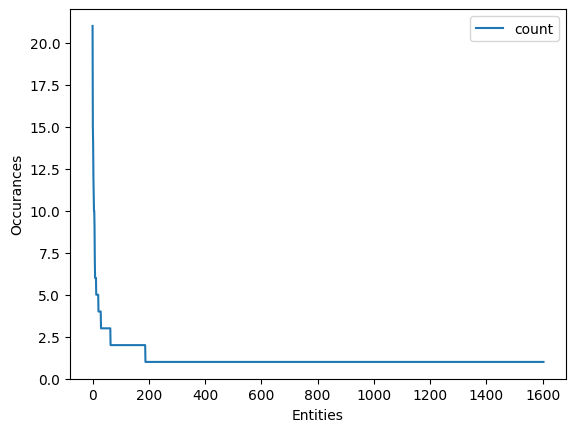

In [51]:
plot_entity_count(train_entities)[1]

<AxesSubplot: xlabel='Entities', ylabel='Occurances'>

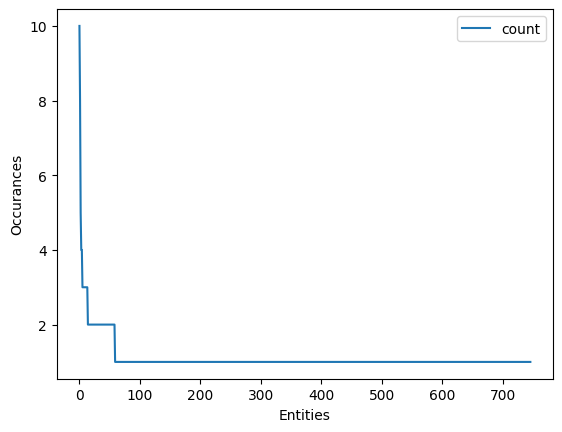

In [52]:
plot_entity_count(dev_entities)[1]

<AxesSubplot: xlabel='Entities', ylabel='Occurances'>

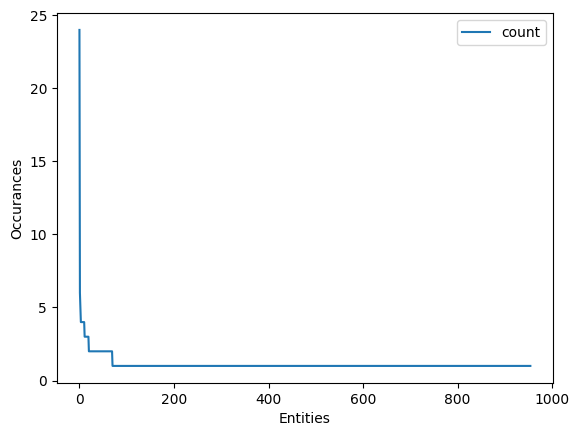

In [53]:
plot_entity_count(test_entities)[1]